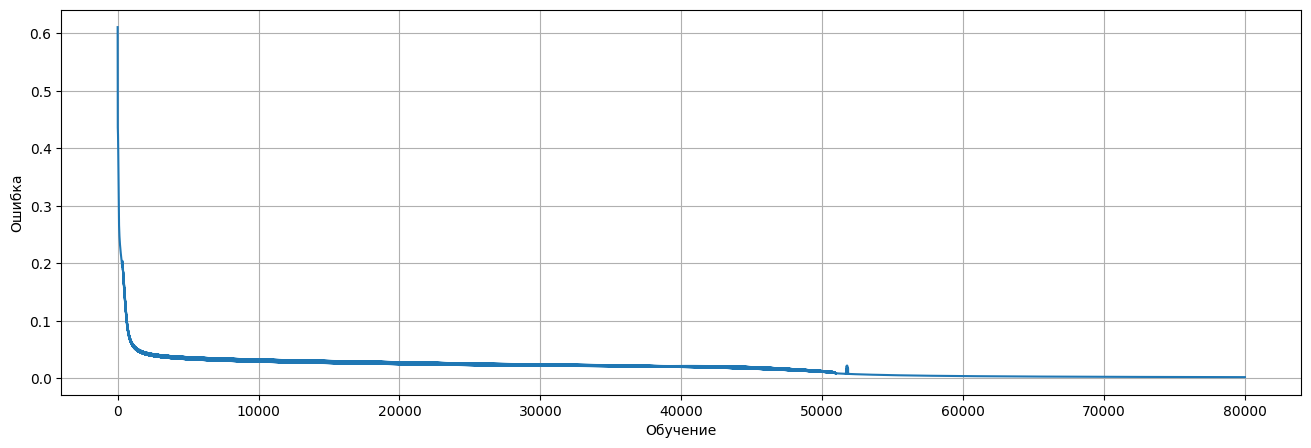

Аккуратность нейронной сети 99.79%
Аккуратность нейронной сети на тесте 98.6%


In [164]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split


warnings.simplefilter(action='ignore', category=FutureWarning)

iris = sns.load_dataset('iris')
iris.sample(5)


# 1
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

def from_one_hot(Y):
    arr = np.zeros((len(Y), 1))
    for i in range(len(Y)):
        l = Y[i]
        for j in range(len(l)):
            if(l[j] == 1): arr[i] = j+1
    return arr

def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_deriv(x):
    return (x)*(1 - (x))

def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)


# 2
iris_data = sns.load_dataset('iris')
iris_data['species'].replace(['setosa', 'virginica', 'versicolor'], [0, 1, 2], inplace=True)

columns = ['sepal_length','sepal_width', 'petal_length', 'petal_width']
x = pd.DataFrame(iris_data, columns=columns)
x = normalize(x.values)

columns = ['species']
y = pd.DataFrame(iris_data, columns=columns)
y = y.values
y = y.flatten()
y = to_one_hot(y)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

columns = ['sepal_length','sepal_width', 'petal_length', 'petal_width']
x = pd.DataFrame(iris_data, columns=columns)


# 3
neuron_numb = 12
n = 0.035
errors = []

w0 = 2*np.random.random((4, neuron_numb)) - 1
# w1 = 2*np.random.random((neuron_numb, 3)) - 1

w1 = 2*np.random.random((neuron_numb, neuron_numb)) - 1
w2 = 2*np.random.random((neuron_numb, 3)) - 1

for i in range(80000):
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))
    layer3 = sigmoid(np.dot(layer2, w2))

    layer3_error = y_train - layer3
    layer3_delta = layer3_error * sigmoid_deriv(layer3)

    # layer2_error = y_train - layer2
    layer2_error = layer3_delta.dot(w2.T)
    layer2_delta = layer2_error * sigmoid_deriv(layer2)

    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(layer1)

    w2 += layer2.T.dot(layer3_delta) * n
    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n

    # error = np.mean(np.abs(layer2_error))
    error = np.mean(np.abs(layer3_error))
    errors.append(error)
    accuracy = (1 - error) * 100


# 4
plt.figure(figsize = (16,5))
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.grid()
plt.show()

print("Аккуратность нейронной сети " + str(round(accuracy,2)) + "%")

layer0_t = X_test
layer1_t = sigmoid(np.dot(layer0_t, w0))
layer2_t = sigmoid(np.dot(layer1_t, w1))
layer3_t = sigmoid(np.dot(layer2_t, w2))
# layer2_error_t = y_test - layer2_t
layer3_error_t = y_test - layer3_t

# error_t = np.mean(np.abs(layer2_error_t))
error_t = np.mean(np.abs(layer3_error_t))
accuracy_t = (1 - error_t) * 100
print("Аккуратность нейронной сети на тесте " + str(round(accuracy_t,2)) + "%")